**Introduction to Functional data analysis (optional)**

When the data can be viewed as a sample of noisy functions, we can directly apply functional data analysis tools. 
The nonparametric smoothing methods play an important role in functional data analysis from preprocessing to the main analysis such as regression, classification and clustering.
For smoothing and functional data analysis, you may use scikit-fda module. For instructions to install this module on your machine, see https://fda.readthedocs.io/en/latest/.

The structure of functional data is defined in FData. To account for functional data of multiple functions measured at irregular grid points, possibly contaminated by noise, we often work with two types of data structure, defined by FDataGrid and FDataBasis.


The main difference compared with the standard matrix or array format is that we keep track of the variable on the
domain of the function (t), as well as the image of the function (f (t)).
More details and examples, see scikit-fda: A Python Package for Functional Data Analysis

Independent study

*   Read Yeast data ( YeastY.csv) and perform exploratory 
data analysis. Summarize main features of the dataset.
* What is the good level of smoothing for this dataset?
* Perform functional PCA and find a suitable finite dimensional representation of the data.
* Perform clustering analysis based on the functional principal component scores. Do you find any subgroups in this
dataset?

In [ ]:
pip install scikit-fda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 420 kB 7.1 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 4.0 MB 45.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for fdasrsf: filename=fdasrsf-2.3.12-cp38-cp38-linux_x86_64.whl size=1687286 sha256=bf3834050da035efeaa448ae8045570248bbf43b2d1e3c97c7b1255cabbc9eb6
  Stored in directory: /root/.cache/pip/wheels/44/8a/ea/3192fc63f0a7413240eade3781e1764dde7a6e07750ad12bfa
Successfully built fdasrsf


In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import pylab
import scipy.stats as stats


import skfda

"""
from skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth
from skfda import FDataGrid
from skfda.datasets import make_gaussian_process
from skfda.exploratory.visualization import SurfaceBoxplot, Boxplot
from skfda.representation.interpolation import SplineInterpolation
import skfda.representation.basis as basis

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler"""





'\nfrom skfda.exploratory.depth import ModifiedBandDepth, IntegratedDepth\nfrom skfda import FDataGrid\nfrom skfda.datasets import make_gaussian_process\nfrom skfda.exploratory.visualization import SurfaceBoxplot, Boxplot\nfrom skfda.representation.interpolation import SplineInterpolation\nimport skfda.representation.basis as basis\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import StandardScaler'

In [ ]:
data = pd.read_csv("YeastY.csv",index_col = 0)
#data = data.transpose()
data = data.reset_index(drop = True)
data

,alpha0,alpha7,alpha14,alpha21,alpha28,alpha35,alpha42,alpha49,alpha56,alpha63,alpha70,alpha77,alpha84,alpha91,alpha98,alpha105,alpha112,alpha119
0,-0.36,-0.42,0.29,-0.14,-0.19,-0.52,0.04,0.04,0.37,0.24,0.13,0.22,0.04,-0.24,-0.22,-0.10,0.22,0.61
1,1.04,0.19,0.47,-1.03,-0.63,-0.68,0.10,-0.02,0.53,0.68,0.51,-0.20,-0.34,-0.59,-0.31,-0.25,0.11,0.44
2,-0.30,-0.45,0.75,0.37,0.27,-0.28,-0.16,-0.13,-0.56,-0.28,0.11,0.30,0.22,0.08,0.07,-0.02,0.11,-0.10
3,-0.46,0.12,-0.06,-0.76,-0.70,-0.79,-0.20,-0.06,0.82,0.36,0.68,-0.13,0.20,-0.32,0.04,0.57,0.17,0.53
4,-1.35,-0.86,-0.22,-0.38,-0.65,-0.79,0.02,0.60,1.38,1.59,1.03,0.99,0.11,-0.39,-0.86,-0.41,-0.20,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,-0.24,-0.40,0.97,0.62,0.60,-0.11,-0.04,-0.70,-0.40,-0.24,0.25,0.30,0.46,-0.13,-0.06,-0.31,-0.33,-0.24
538,-0.41,-0.57,1.15,0.69,0.61,0.00,-0.22,-0.50,-0.43,-0.33,0.22,0.64,0.42,-0.09,-0.03,-0.50,-0.08,-0.57
539,-0.79,-0.25,1.18,0.84,0.19,-0.11,-0.42,-0.56,-0.36,-0.12,0.68,0.80,0.08,-0.24,-0.14,-0.27,-0.32,-0.19
540,-0.68,-0.19,1.23,0.84,0.14,-0.44,-0.44,-0.75,-0.26,-0.06,0.63,0.98,0.07,-0.24,-0.35,-0.22,-0.33,0.08


In [ ]:
fgrid = skfda.FDataGrid(data.transpose(),data.index)     # creating the datagrid

EXPLORATORY ANALYSIS 

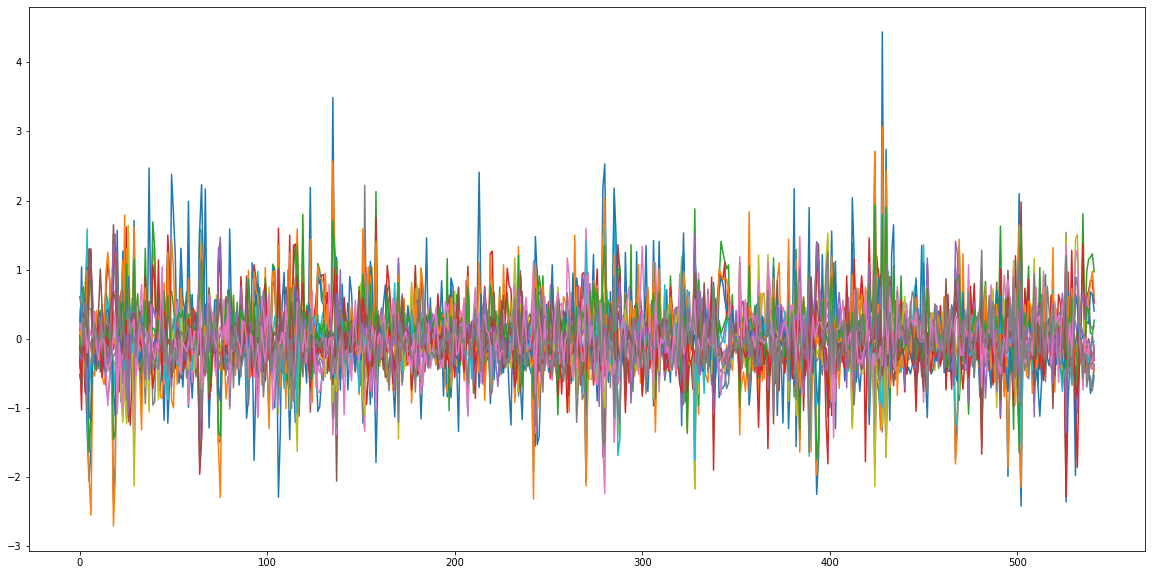

In [ ]:
fig = plt.figure(figsize=(20,10))              # plotting the functions 
plt.plot(data)   
plt.show()

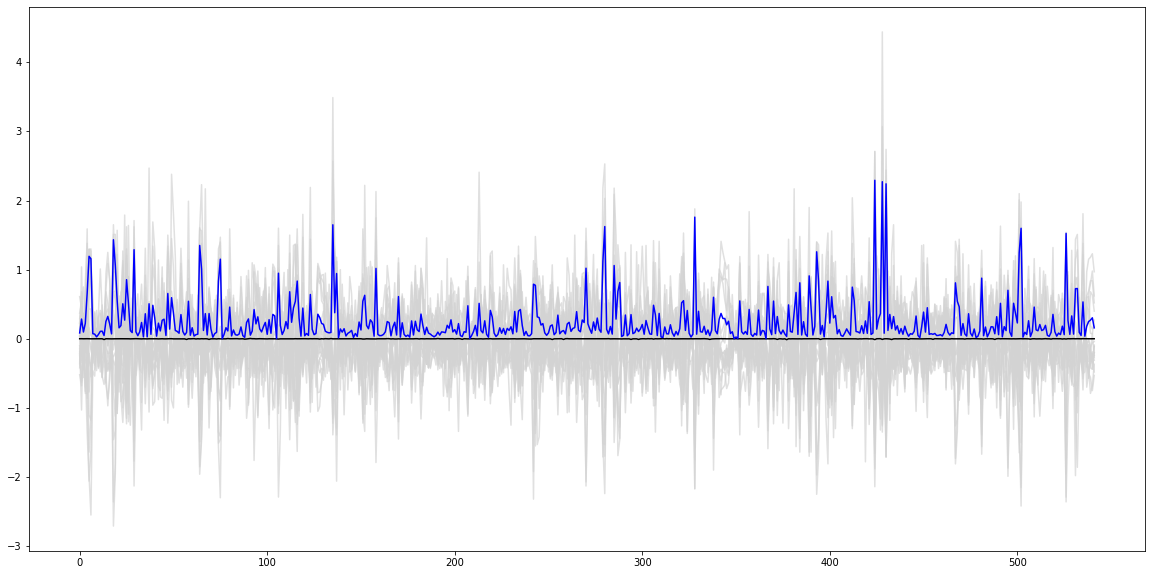

In [ ]:
# plotting mean and variance 


# grey = functions , black = mean, blue = variance 

mean = skfda.exploratory.stats.mean(fgrid)
var = skfda.exploratory.stats.var(fgrid)

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(fgrid.data_matrix[:,:,0]),color='lightgrey', alpha=0.7, )

plt.plot(mean.data_matrix[0],color='black')
plt.plot(var.data_matrix[0],color='blue')
plt.show()





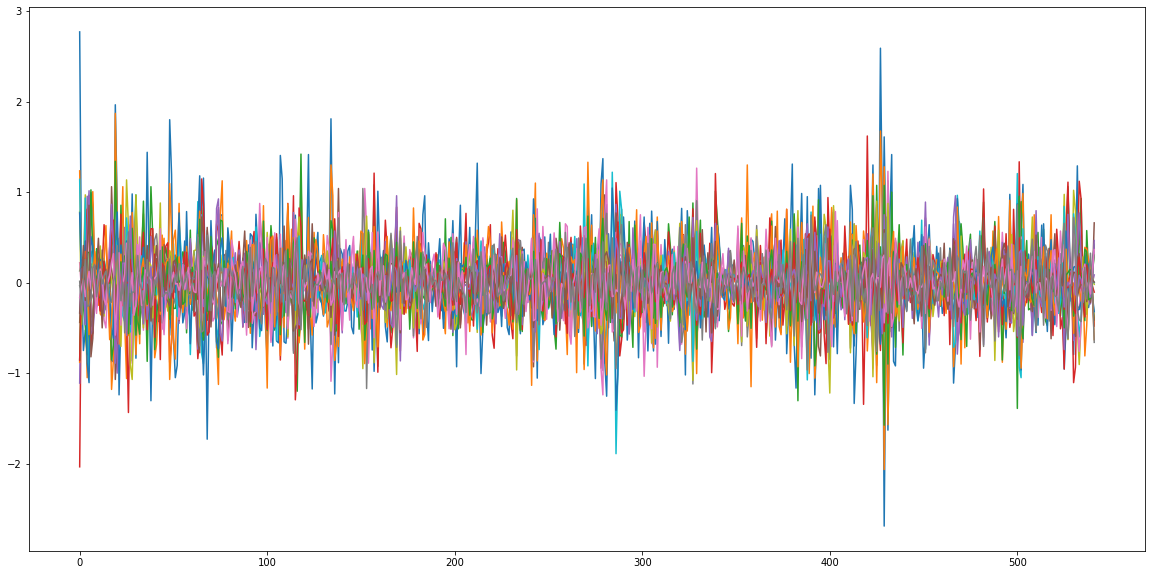

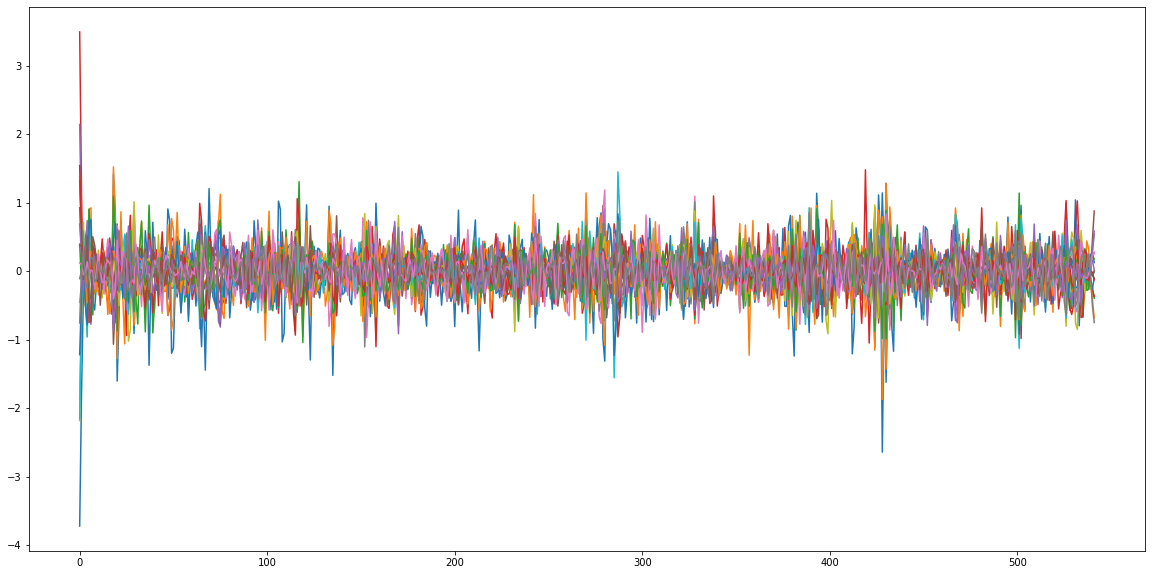

In [ ]:
# plotting derivative 


der1 = fgrid.derivative()

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(der1.data_matrix[:,:,0]))

plt.show()

#plotting 2nd derivative 

der2 = der1.derivative()

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(der2.data_matrix[:,:,0]))

plt.show()


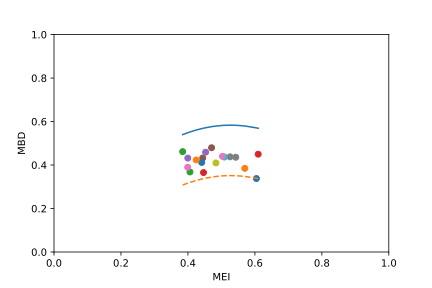

In [ ]:
skfda.exploratory.visualization.Outliergram(fgrid)     # is an outliergram, the bands represents
# the boundary between outlying and non-outlying observations. if a point is out of them it might be an outlier. In this case the blue point (correspond to the first column function) might be


SMOOTHING

different smoothing techinque are tested:
-kernel smoothing 
-basis smoothing

for kernel smoothing 3 different way to compute the Hat matrix are used:
- NadarayaWatson
-KNeighbors
-LocalLinearRegression

the optimal smoothing parameter is selected minimizing the GCV score. the range for the search is selected looking at the best score for different ranges.

for basis smoothing a Kspline basis is used.

the smoothing with the best scores are compared:

- NadarayaWatson is oversmoothing 
-KNeighbors seems still noisy 
-LocalLinearRegression appears to be the best one 
- Basis smoothing is very oversmoothing


In [ ]:
############################## removing the outlier 

fgrid = skfda.FDataGrid(data.iloc[:,1:].transpose(),data.index) 



{'smoothing_parameter': 30.0}
-0.22268411062694113


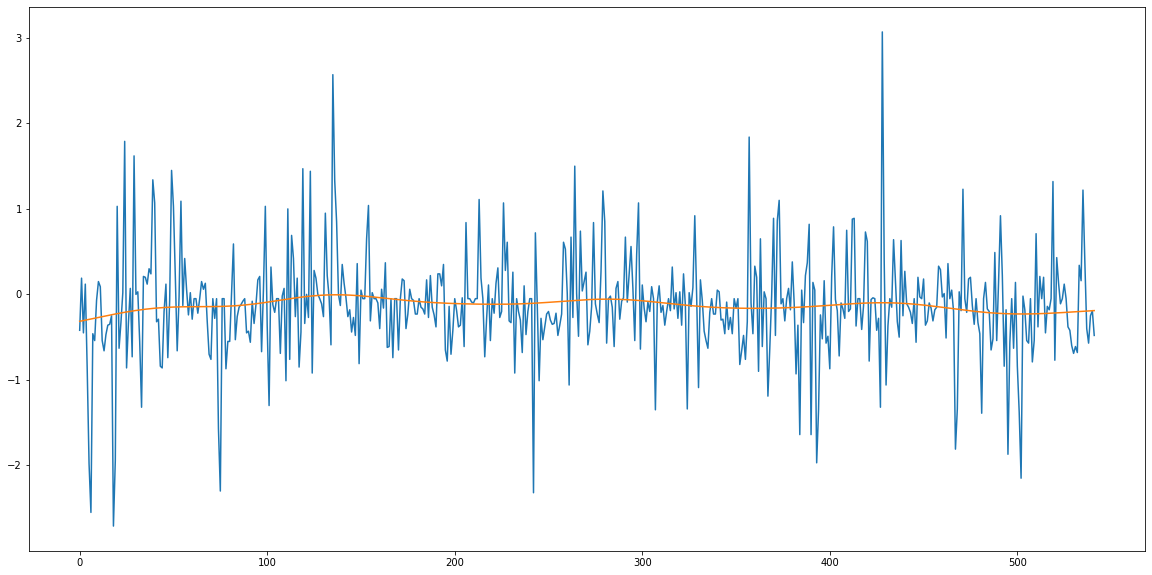

In [ ]:


kernel_smoother = skfda.preprocessing.smoothing.kernel_smoothers.NadarayaWatsonSmoother()

nw= skfda.preprocessing.smoothing.validation.SmoothingParameterSearch(kernel_smoother,np.linspace(1.,30.,100))



nw.fit(fgrid)
nw_fd = nw.transform(fgrid)
print(nw.best_params_)

print(nw.best_score_)

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(fgrid.data_matrix[0,:,0]))
plt.plot(np.transpose(nw_fd.data_matrix[0,:,0]))

plt.show()






{'smoothing_parameter': 39}
-0.22988959724702798


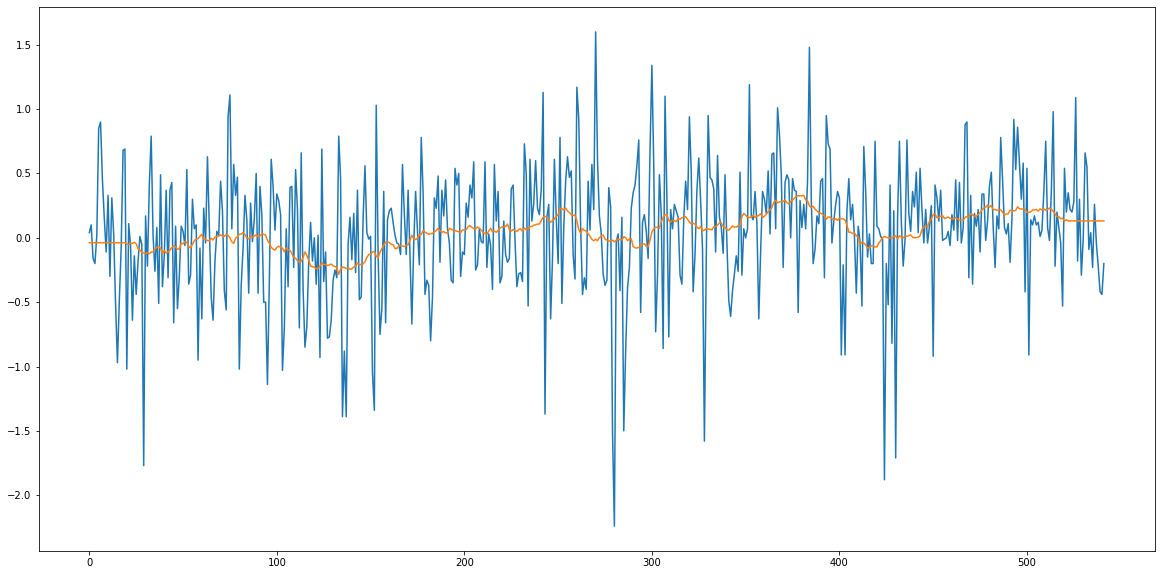

In [ ]:


kernel_smoother = skfda.preprocessing.smoothing.kernel_smoothers.KNeighborsSmoother()

nw= skfda.preprocessing.smoothing.validation.SmoothingParameterSearch(kernel_smoother,range(4,40))



nw.fit(fgrid)
nw_fd = nw.transform(fgrid)
print(nw.best_params_)

print(nw.best_score_)

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(fgrid.data_matrix[5,:,0]))
plt.plot(np.transpose(nw_fd.data_matrix[5,:,0]))

plt.show()




{'smoothing_parameter': 16.353535353535353}
-0.21638245134631637


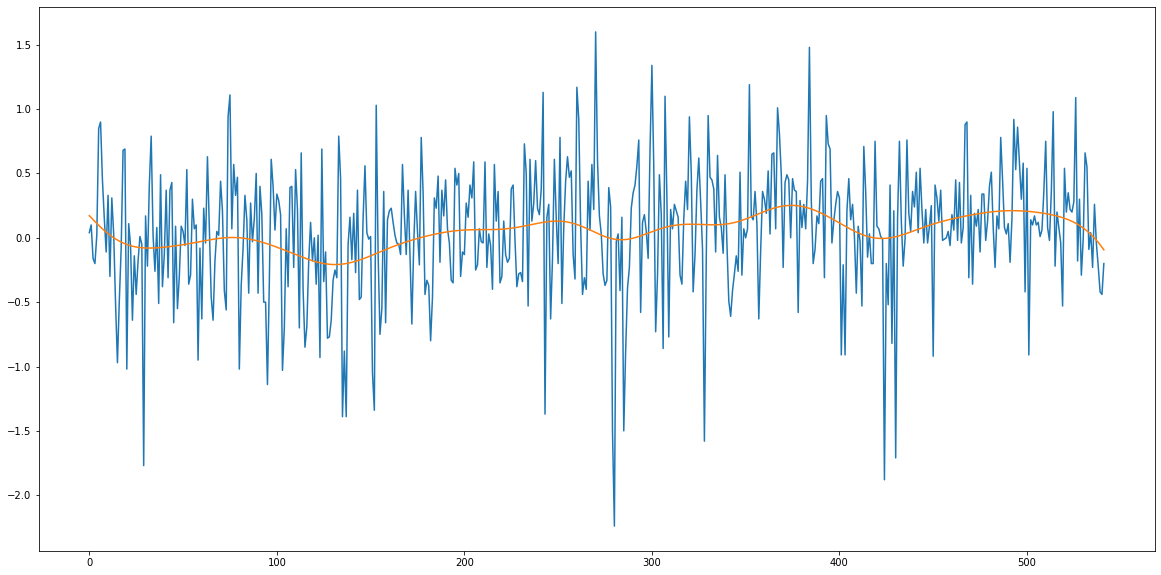

In [ ]:
kernel_smoother = skfda.preprocessing.smoothing.kernel_smoothers.LocalLinearRegressionSmoother()

nw= skfda.preprocessing.smoothing.validation.SmoothingParameterSearch(kernel_smoother,np.linspace(1.,20.,100),scoring= skfda.preprocessing.smoothing.validation.LinearSmootherLeaveOneOutScorer())



nw.fit(fgrid)
nw_fd = nw.transform(fgrid)
print(nw.best_params_)

print(nw.best_score_)

fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(fgrid.data_matrix[5,:,0]))
plt.plot(np.transpose(nw_fd.data_matrix[5,:,0]))

plt.show()

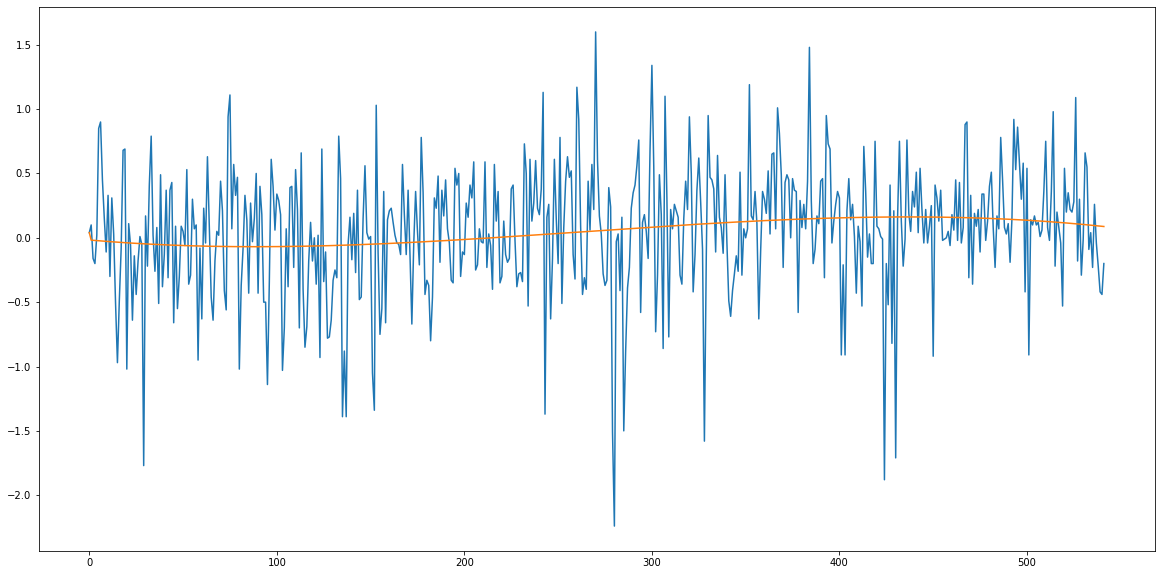

In [ ]:
#basis smoothing

basis = skfda.representation.basis.BSpline(n_basis=10)
smoother = skfda.preprocessing.smoothing.BasisSmoother(basis,smoothing_parameter=5.)
fd_smooth = smoother.fit_transform(fgrid)


fig = plt.figure(figsize=(20,10)) 

plt.plot(np.transpose(fgrid.data_matrix[5,:,0]))
plt.plot(np.transpose(fd_smooth.data_matrix[5,:,0]))

plt.show()

In [ ]:
# best smoothing 

kernel_smoother = skfda.preprocessing.smoothing.kernel_smoothers.LocalLinearRegressionSmoother(smoothing_parameter = 16.)


kernel_smoother.fit(fgrid)
smoothed_df = kernel_smoother.transform(fgrid)




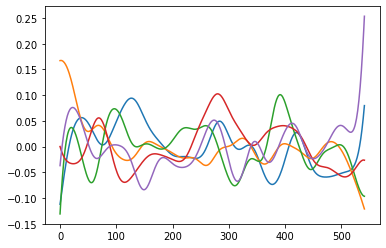

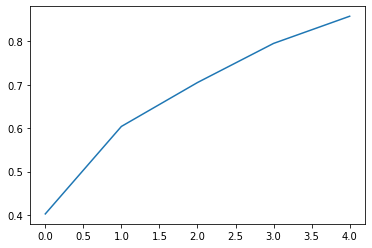

In [ ]:
# Functional PCA 
from sklearn.preprocessing import StandardScaler
fpca = skfda.preprocessing.dim_reduction.feature_extraction.FPCA(n_components=5)


scaled_data = StandardScaler().fit_transform(np.transpose(smoothed_df.data_matrix[:,:,0]))


scaled_data = skfda.FDataGrid(np.transpose(scaled_data),data.index)



fpca.fit(scaled_data)

fpca.components_.plot()
plt.show()


plt.plot(np.cumsum(fpca.explained_variance_ratio_))     # plotting cumulative sum of variance ratio to decide the num of components
plt.show()


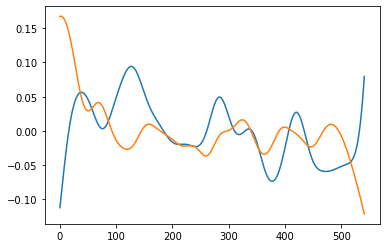

In [ ]:

plt.plot(fpca.components_.data_matrix[0,:,0])
plt.plot(fpca.components_.data_matrix[1,:,0])

Clustering 


[2 2 2 1 1 1 1 1 0 2 2 0 0 1 0 1 1]


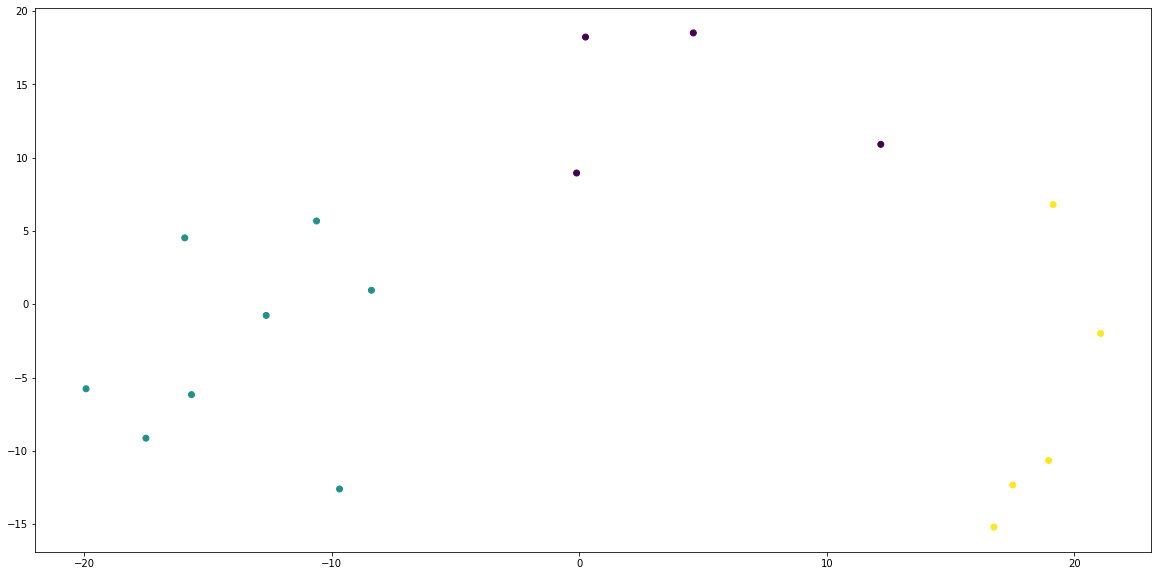

In [ ]:
# clustering based on the PCA scores. We can see 3 cluster based on which components explains each functions



from sklearn.cluster import KMeans


scores = fpca.transform(scaled_data)


kmeans = KMeans(n_clusters=3).fit(scores)

print(kmeans.predict(scores))

color = kmeans.predict(scores)
fig = plt.figure(figsize=(20,10))
plt.scatter(scores[:,0],scores[:,1],  c = color )


plt.show()



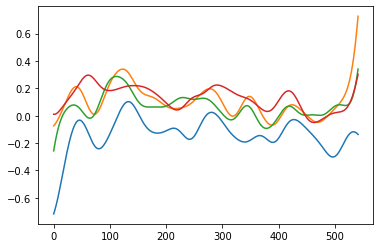

In [ ]:
plt.plot(np.transpose(smoothed_df .data_matrix[0,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[1,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[2,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[9,:,0]))

plt.show()

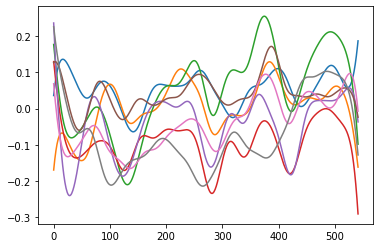

In [ ]:
plt.plot(np.transpose(smoothed_df .data_matrix[3,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[4,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[5,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[6,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[7,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[13,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[15,:,0]))
plt.plot(np.transpose(smoothed_df .data_matrix[16,:,0]))

plt.show()

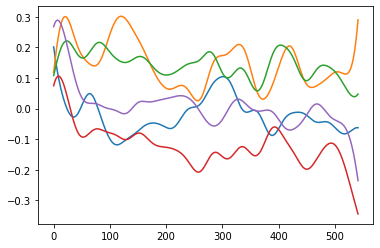

In [ ]:
plt.plot(np.transpose(smoothed_df.data_matrix[8,:,0]))
plt.plot(np.transpose(smoothed_df.data_matrix[10,:,0]))
plt.plot(np.transpose(smoothed_df.data_matrix[11,:,0]))
plt.plot(np.transpose(smoothed_df.data_matrix[12,:,0]))
plt.plot(np.transpose(smoothed_df.data_matrix[14,:,0]))
plt.show()